# Results analysis

## Importing modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import functions as fn 

## Parameters

In [2]:
# Paths
RESULTS_PATH: str = "./results"
LOGS_PATH: str = f"{RESULTS_PATH}/logs"
GA_RESULTS_PATH: str = f"{LOGS_PATH}/GA results.csv"
ACO_RESULTS_PATH: str = f"{LOGS_PATH}/ACO results.csv"
GA_ACO_RESULTS_PATH: str = f"{LOGS_PATH}/GA-ACO results.csv"
GA_RESULTS_AGGREGATED_PATH: str = f"{LOGS_PATH}/GA results aggregated.csv"
ACO_RESULTS_AGGREGATED_PATH: str = f"{LOGS_PATH}/ACO results aggregated.csv"
GA_ACO_RESULTS_AGGREGATED_PATH: str = f"{LOGS_PATH}/GA-ACO results aggregated.csv"
GA_STATISTICS_PATH: str = f"{LOGS_PATH}/GA statistics.csv"
ACO_STATISTICS_PATH: str = f"{LOGS_PATH}/ACO statistics.csv"
GA_ACO_STATISTICS_PATH: str = f"{LOGS_PATH}/GA-ACO statistics.csv"

# Categorical columns
GA_CATEGORICAL_COLUMNS = ["Selection Type", "Revisit Possible", "Bias"]
ACO_CATEGORICAL_COLUMNS = ["Alpha", "Beta", "Revisit Possible"]
GA_ACO_CATEGORICAL_COLUMNS = ["GA Revisit Possible", "Selection Type", "Alpha", "Beta", "ACO Revisit Possible"]

# Other
LINE: str = '-' * 100
DOUBLE_LINE: str = '=' * 100

## GA results

### Loading GA results as a DataFrame

In [3]:
ga_results = pd.read_csv(GA_RESULTS_PATH)

ga_results.head(10)

,Random State,Selection Type,Revisit Possible,Bias,First Full Path Generation,Optimal Path Generation,Best Generation,Best Score,Best Secondary Score,Total Time
0,10,all to all,True,1.5,33.0,33.0,33,0.0000,20,0.83
1,10,best to rest,True,1.5,41.0,41.0,41,0.0000,20,0.93
2,10,hybrid,True,1.5,NaN,NaN,4,5.1516,32,19.88
3,10,all to all,False,1.5,73.0,73.0,73,0.0000,20,1.49
4,10,best to rest,False,1.5,29.0,29.0,29,0.0000,20,0.55
5,10,hybrid,False,1.5,NaN,NaN,26,1.8028,25,15.19
6,10,all to all,True,3.0,45.0,45.0,45,0.0000,20,1.10
7,10,best to rest,True,3.0,42.0,42.0,42,0.0000,20,0.95
8,10,hybrid,True,3.0,NaN,NaN,4,5.1516,32,19.83
9,10,all to all,False,3.0,109.0,109.0,109,0.0000,20,2.30


### Removing Random State Column

In [4]:
ga_results.drop(columns=["Random State"], inplace=True)

### Checking missing values and dropping rows and columns with missing values

In [5]:
ga_missing_results, ga_missing_columns = fn.check_missing_values(
    dataframe = ga_results,
    double_line = DOUBLE_LINE, 
    line = LINE, 
    return_missing = True
)

ga_results.drop(columns=ga_missing_columns, inplace=True)
ga_missing_results.drop(columns=ga_missing_columns, inplace=True)

Missing values check:
First Full Path Generation missing 40 values out of 120 values (33.33%)
Optimal Path Generation missing 40 values out of 120 values (33.33%)


/tmp/ipykernel_318337/606756366.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ga_missing_results.drop(columns=ga_missing_columns, inplace=True)


In [6]:
ga_missing_results.head(40)

,Selection Type,Revisit Possible,Bias,Best Generation,Best Score,Best Secondary Score,Total Time
2,hybrid,True,1.5,4,5.1516,32,19.88
5,hybrid,False,1.5,26,1.8028,25,15.19
8,hybrid,True,3.0,4,5.1516,32,19.83
11,hybrid,False,3.0,26,1.8028,25,15.12
14,hybrid,True,1.5,4,5.1516,32,19.88
17,hybrid,False,1.5,26,1.8028,25,15.12
20,hybrid,True,3.0,4,5.1516,32,19.87
23,hybrid,False,3.0,26,1.8028,25,15.14
26,hybrid,True,1.5,4,5.1516,32,19.84
29,hybrid,False,1.5,26,1.8028,25,15.13


### Statistic analysis

In [7]:
ga_statistic = ga_results.describe()
ga_statistic = ga_statistic.drop(index="count")
ga_statistic = ga_statistic.round(2)
ga_statistic = ga_statistic.drop(columns=["Bias"])

ga_statistic.to_csv(GA_STATISTICS_PATH, index=False)

ga_statistic.head(7)

,Best Generation,Best Score,Best Secondary Score,Total Time
mean,41.42,1.16,22.83,6.63
std,28.45,1.91,4.51,7.89
min,4.00,0.00,20.00,0.54
25%,26.00,0.00,20.00,0.95
50%,37.00,0.00,20.00,1.36
75%,50.00,1.80,25.00,15.19
max,109.00,5.15,32.00,20.01


### Aggregate results by categorical values

In [8]:
ga_results_aggregated = fn.aggregate_categorical_results(
    dataframe = ga_results, 
    categorical_columns = GA_CATEGORICAL_COLUMNS
)

ga_results_aggregated.to_csv(GA_RESULTS_AGGREGATED_PATH, index=False)

ga_results_aggregated.head(12)

,Selection Type,Revisit Possible,Bias,Best Generation,Best Score,Best Secondary Score,Total Time
0,all to all,False,1.5,73.0,0.00,20.0,1.49
1,all to all,False,3.0,109.0,0.00,20.0,2.31
2,all to all,True,1.5,33.0,0.00,20.0,0.80
3,all to all,True,3.0,45.0,0.00,20.0,1.10
4,best to rest,False,1.5,29.0,0.00,20.0,0.55
5,best to rest,False,3.0,65.0,0.00,20.0,1.24
6,best to rest,True,1.5,41.0,0.00,20.0,0.94
7,best to rest,True,3.0,42.0,0.00,20.0,0.95
8,hybrid,False,1.5,26.0,1.80,25.0,15.18
9,hybrid,False,3.0,26.0,1.80,25.0,15.19


### Results vizualization

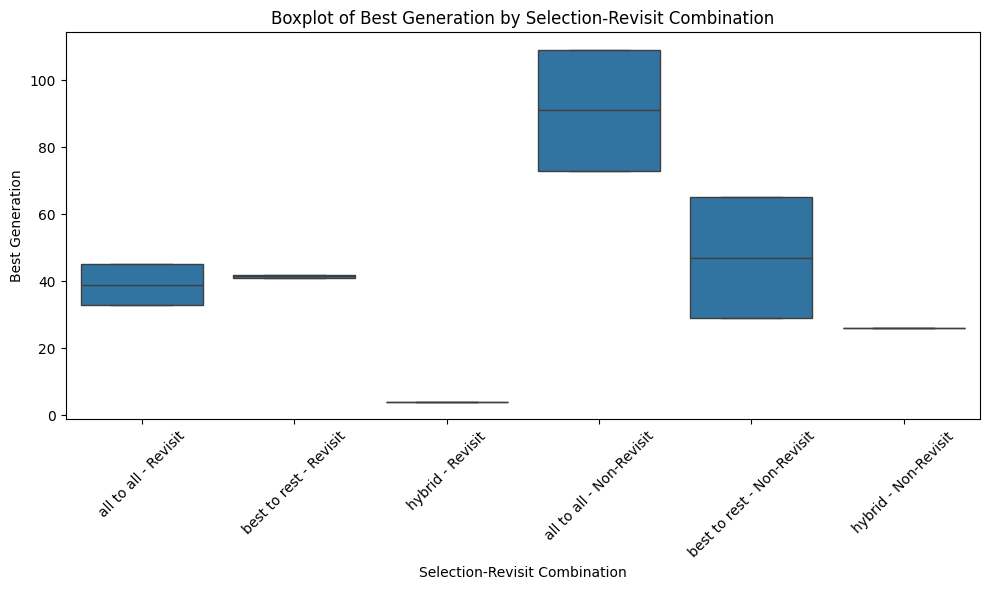

In [9]:
ga_visualization = ga_results.copy()

ga_visualization["Selection-Revisit Combination"] = ga_visualization.apply(
    lambda row: f"{row['Selection Type']} - {'Revisit' if row['Revisit Possible'] else 'Non-Revisit'}", 
    axis=1
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_visualization, x="Selection-Revisit Combination", y="Best Generation")
plt.title("Boxplot of Best Generation by Selection-Revisit Combination")
plt.xlabel("Selection-Revisit Combination")
plt.ylabel("Best Generation")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

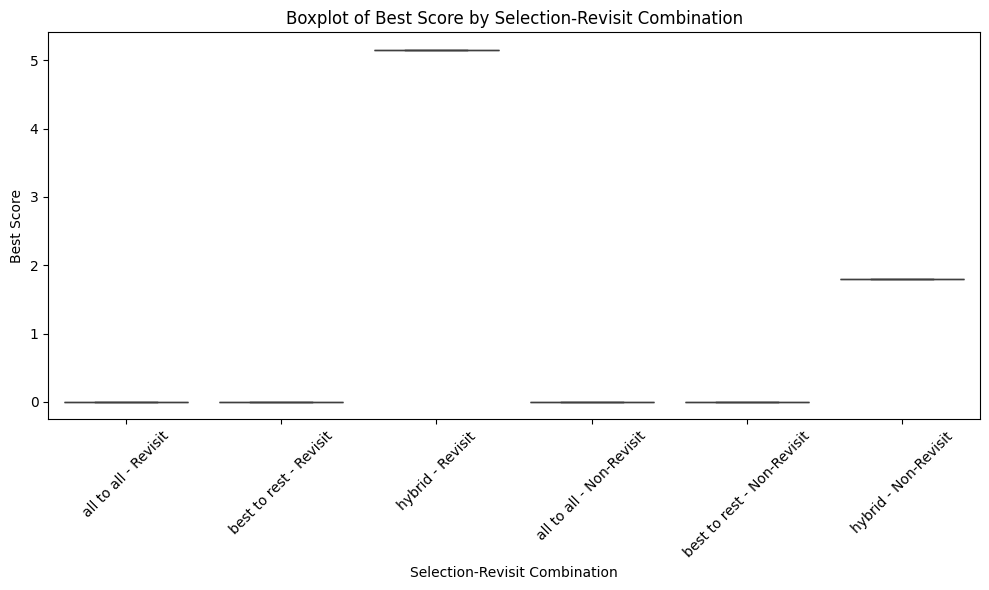

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_visualization, x="Selection-Revisit Combination", y="Best Score")
plt.title("Boxplot of Best Score by Selection-Revisit Combination")
plt.xlabel("Selection-Revisit Combination")
plt.ylabel("Best Score")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

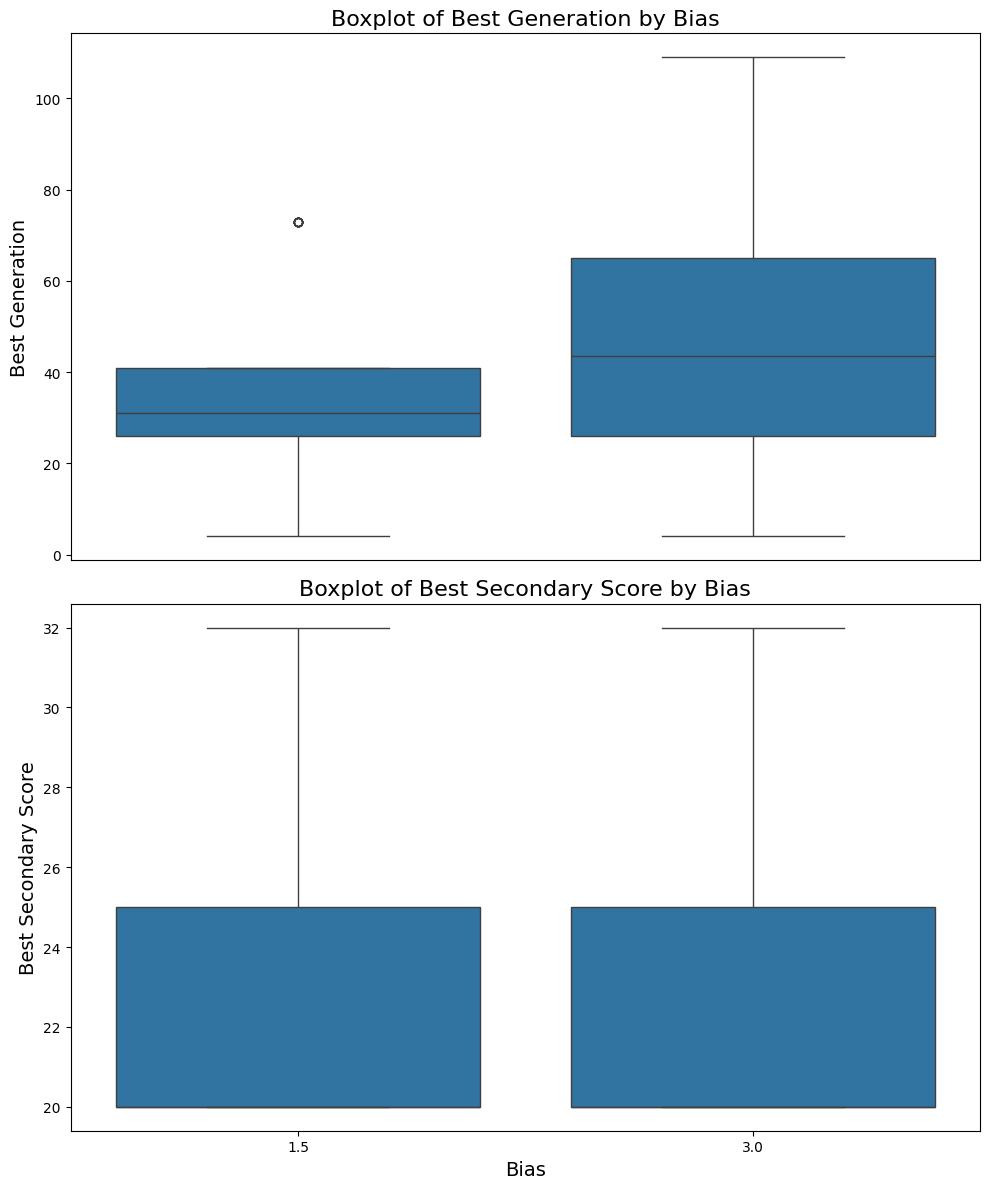

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharey=False)

sns.boxplot(data=ga_visualization, x="Bias", y="Best Generation", ax=axes[0])
axes[0].set_title("Boxplot of Best Generation by Bias", fontsize=16)
axes[0].set_ylabel("Best Generation", fontsize=14)
axes[0].set_xlabel("") 
axes[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False)  

sns.boxplot(data=ga_visualization, x="Bias", y="Best Secondary Score", ax=axes[1])
axes[1].set_title("Boxplot of Best Secondary Score by Bias", fontsize=16)
axes[1].set_ylabel("Best Secondary Score", fontsize=14)
axes[1].set_xlabel("Bias", fontsize=14)

plt.tight_layout()
plt.show()

## ACO results

### Load ACO results as a DataFrame

In [12]:
aco_results = pd.read_csv(ACO_RESULTS_PATH)

aco_results.head(10)

,Random State,Alpha,Beta,Revisit Possible,First Full Path,First Optimal Path,Convergence Iteration,Total Time
0,10,1.5,1.5,True,33,36.0,51.0,5.24
1,10,1.5,3.0,True,4,6.0,173.0,12.76
2,10,3.0,1.5,True,33,35.0,38.0,4.31
3,10,3.0,3.0,True,4,5.0,10.0,1.03
4,10,1.5,1.5,False,2,3.0,31.0,2.18
5,10,1.5,3.0,False,1,2.0,9.0,0.56
6,10,3.0,1.5,False,2,3.0,4.0,0.22
7,10,3.0,3.0,False,1,2.0,5.0,0.31
8,20,1.5,1.5,True,250,254.0,274.0,31.57
9,20,1.5,3.0,True,2,4.0,45.0,3.44


### Removing Random State Column

In [13]:
aco_results.drop(columns=["Random State"], inplace=True)

### Checking missing values and dropping rows and columns with missing values

In [14]:
aco_missing_results, _ = fn.check_missing_values(
    dataframe = aco_results,
    double_line = DOUBLE_LINE, 
    line = LINE, 
    return_missing = True 
)

aco_results.dropna(inplace=True)

Missing values check:
First Optimal Path missing 5 values out of 80 values (6.25%)
Convergence Iteration missing 6 values out of 80 values (7.50%)


In [15]:
aco_missing_results.head(8)

,Alpha,Beta,Revisit Possible,First Full Path,First Optimal Path,Convergence Iteration,Total Time
44,1.5,1.5,False,1,NaN,NaN,75.51
46,3.0,1.5,False,1,NaN,NaN,75.27
50,3.0,1.5,True,586,NaN,NaN,100.84
60,1.5,1.5,False,1,5.0,NaN,79.13
62,3.0,1.5,False,1,NaN,NaN,83.30
66,3.0,1.5,True,25,NaN,NaN,86.75


### Statistic analysis

In [16]:
aco_statistic = aco_results.describe()
aco_statistic = aco_statistic.drop(index="count")
aco_statistic = aco_statistic.round(2)
aco_statistic = aco_statistic.drop(columns=["Alpha", "Beta"])

aco_statistic.to_csv(ACO_STATISTICS_PATH, index=False)

aco_statistic.head(7)

,First Full Path,First Optimal Path,Convergence Iteration,Total Time
mean,28.61,30.68,53.35,5.25
std,81.15,82.55,93.90,10.34
min,1.00,1.00,3.00,0.17
25%,1.00,2.00,5.25,0.40
50%,2.00,4.00,11.00,0.92
75%,11.00,13.00,54.50,5.94
max,586.00,600.00,602.00,70.71


### Aggregate results by categorical values

In [17]:
aco_results_aggregated = fn.aggregate_categorical_results(
    dataframe = aco_results, 
    categorical_columns = ACO_CATEGORICAL_COLUMNS
)

aco_results_aggregated.to_csv(ACO_RESULTS_AGGREGATED_PATH, index=False)

aco_results_aggregated.head(8)

,Alpha,Beta,Revisit Possible,First Full Path,First Optimal Path,Convergence Iteration,Total Time
0,1.5,1.5,False,1.38,3.00,13.75,0.92
1,1.5,1.5,True,129.30,134.40,176.60,18.87
2,1.5,3.0,False,1.00,1.90,8.40,0.54
3,1.5,3.0,True,5.00,7.90,77.30,6.26
4,3.0,1.5,False,1.38,2.62,5.00,0.31
5,3.0,1.5,True,85.25,87.25,113.88,12.37
6,3.0,3.0,False,1.00,1.80,4.30,0.27
7,3.0,3.0,True,5.00,6.70,22.10,2.07


### Results vizualization

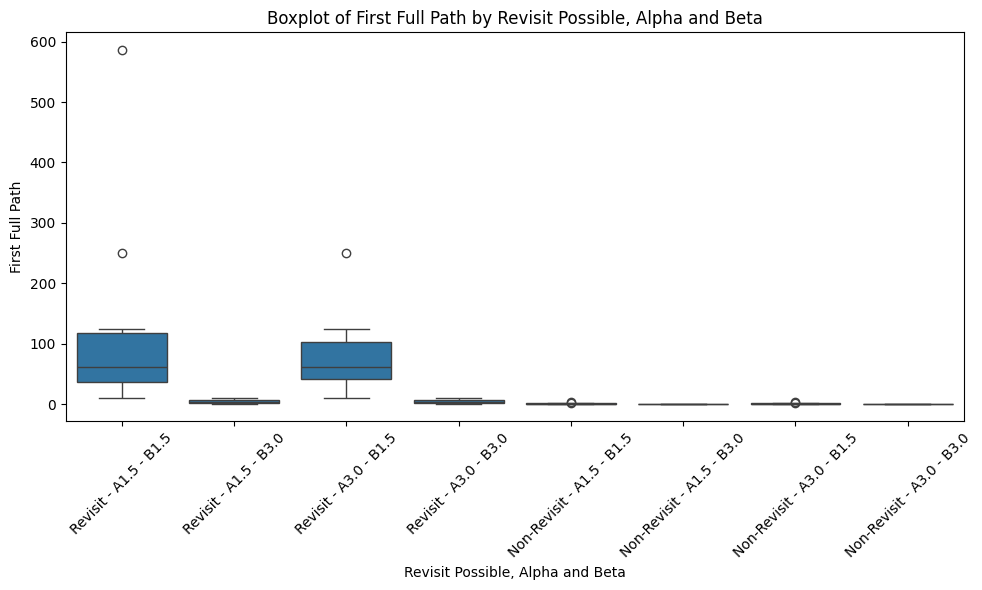

In [18]:
aco_visualization = aco_results.copy()

aco_visualization["Revisit-Alpha-Beta Combination"] = aco_visualization.apply(
    lambda row: f"{'Revisit' if row['Revisit Possible'] else 'Non-Revisit'} - A{row['Alpha']} - B{row['Beta']}", 
    axis=1
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=aco_visualization, x="Revisit-Alpha-Beta Combination", y="First Full Path")
plt.title("Boxplot of First Full Path by Revisit Possible, Alpha and Beta")
plt.xlabel("Revisit Possible, Alpha and Beta")
plt.ylabel("First Full Path")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

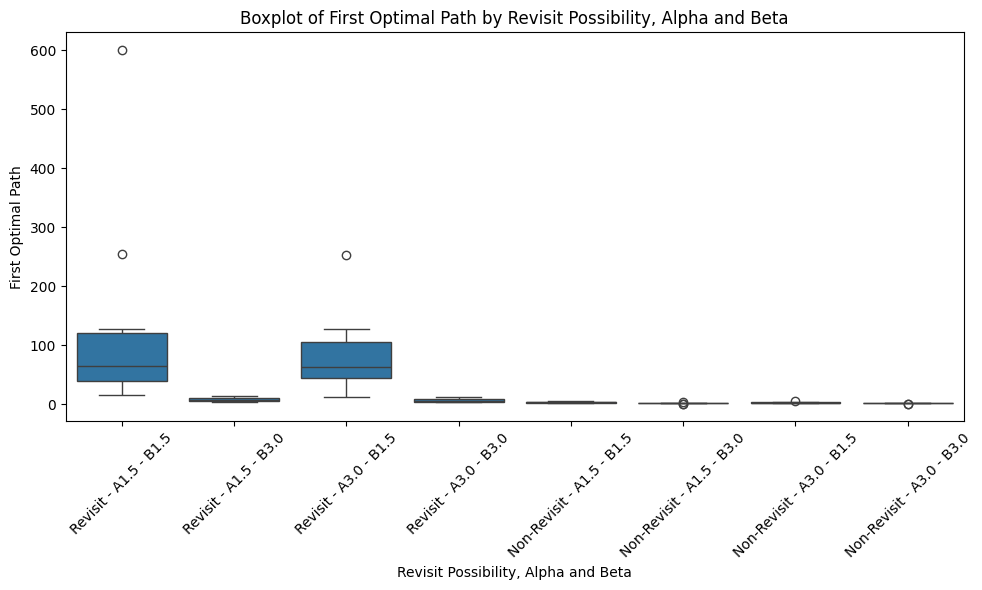

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=aco_visualization, x="Revisit-Alpha-Beta Combination", y="First Optimal Path")
plt.title("Boxplot of First Optimal Path by Revisit Possibility, Alpha and Beta")
plt.xlabel("Revisit Possibility, Alpha and Beta")
plt.ylabel("First Optimal Path")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

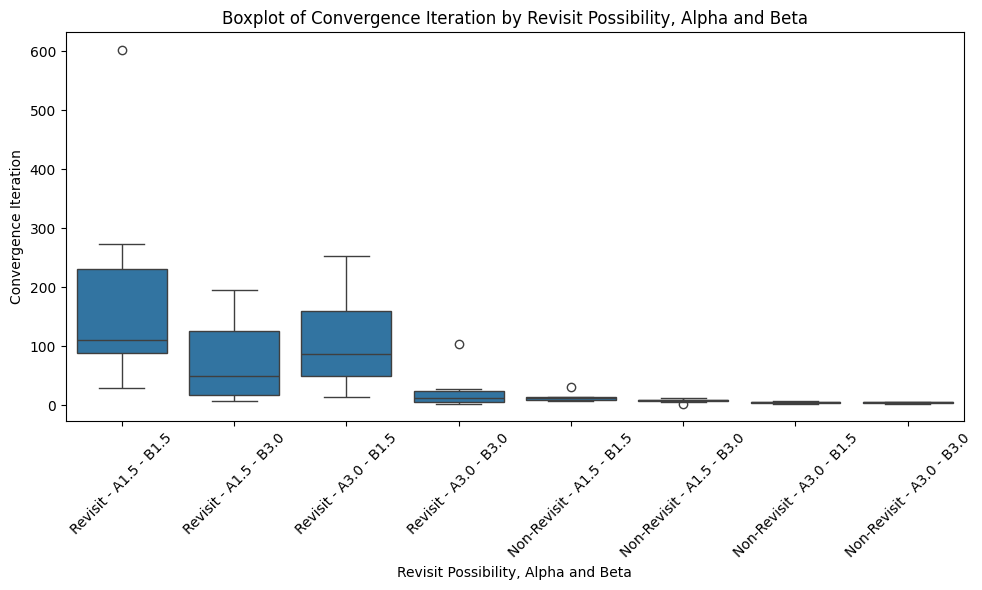

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=aco_visualization, x="Revisit-Alpha-Beta Combination", y="Convergence Iteration")
plt.title("Boxplot of Convergence Iteration by Revisit Possibility, Alpha and Beta")
plt.xlabel("Revisit Possibility, Alpha and Beta")
plt.ylabel("Convergence Iteration")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## GA-ACO results

### Load combined GA-ACO results as a DataFrame

In [21]:
ga_aco_results = pd.read_csv(GA_ACO_RESULTS_PATH)

ga_aco_results.head(10)

,Random State,GA Revisit Possible,Selection Type,ACO Revisit Possible,Alpha,Beta,GA Best Generation,GA Best Score,GA Best Secondary Score,ACO First Full Path,ACO First Optimal Path,ACO Convergence Iteration,Total Time
0,10,True,all to all,True,1.5,1.5,18,0.0,20,1,1.0,17.0,1.04
1,10,True,all to all,True,1.5,3.0,18,0.0,20,1,1.0,12.0,0.97
2,10,True,all to all,True,3.0,1.5,18,0.0,20,1,1.0,7.0,1.09
3,10,True,all to all,True,3.0,3.0,18,0.0,20,1,1.0,15.0,1.80
4,10,True,all to all,False,1.5,1.5,18,0.0,20,1,1.0,6.0,0.82
5,10,True,all to all,False,1.5,3.0,18,0.0,20,1,1.0,4.0,0.70
6,10,True,all to all,False,3.0,1.5,18,0.0,20,1,1.0,4.0,0.70
7,10,True,all to all,False,3.0,3.0,18,0.0,20,1,1.0,5.0,0.77
8,10,False,all to all,True,1.5,1.5,12,0.0,20,1,NaN,NaN,76.00
9,10,False,all to all,True,1.5,3.0,12,0.0,20,1,2.0,173.0,10.78


### Removing Random State Column

In [22]:
ga_aco_results.drop(columns=["Random State"], inplace=True)

### Checking missing values and dropping rows and columns with missing values

In [23]:
ga_aco_missing_results, _ = fn.check_missing_values(
    dataframe = ga_aco_results,
    double_line = DOUBLE_LINE, 
    line = LINE, 
    return_missing = True 
)

ga_aco_results.dropna(inplace=True)

Missing values check:
ACO First Optimal Path missing 18 values out of 480 values (3.75%)
ACO Convergence Iteration missing 34 values out of 480 values (7.08%)


In [24]:
ga_aco_missing_results.head(37)

,GA Revisit Possible,Selection Type,ACO Revisit Possible,Alpha,Beta,GA Best Generation,GA Best Score,GA Best Secondary Score,ACO First Full Path,ACO First Optimal Path,ACO Convergence Iteration,Total Time
8,False,all to all,True,1.5,1.5,12,0.0000,20,1,NaN,NaN,76.00
46,False,hybrid,False,3.0,1.5,26,1.8028,25,1,2.0,NaN,73.77
47,False,hybrid,False,3.0,3.0,26,1.8028,25,1,2.0,NaN,73.58
81,True,hybrid,True,1.5,3.0,4,5.1516,32,1,NaN,NaN,73.55
82,True,hybrid,True,3.0,1.5,4,5.1516,32,1,NaN,NaN,63.87
83,True,hybrid,True,3.0,3.0,4,5.1516,32,1,NaN,NaN,62.12
88,False,hybrid,True,1.5,1.5,26,1.8028,25,1,NaN,NaN,75.58
90,False,hybrid,True,3.0,1.5,26,1.8028,25,1,NaN,NaN,61.33
91,False,hybrid,True,3.0,3.0,26,1.8028,25,1,NaN,NaN,63.56
94,False,hybrid,False,3.0,1.5,26,1.8028,25,1,NaN,NaN,71.46


### Statistic analysis

In [25]:
ga_aco_statistic = ga_aco_results.describe()
ga_aco_statistic = ga_aco_statistic.drop(index="count")
ga_aco_statistic = ga_aco_statistic.round(2)
ga_aco_statistic = ga_aco_statistic.drop(columns=["Alpha", "Beta"])

ga_aco_statistic.to_csv(GA_ACO_STATISTICS_PATH, index=False)

ga_aco_statistic.head(7)

,GA Best Generation,GA Best Score,GA Best Secondary Score,ACO First Full Path,ACO First Optimal Path,ACO Convergence Iteration,Total Time
mean,16.31,1.09,22.63,1.21,2.03,22.18,2.03
std,10.15,1.94,4.56,1.47,2.27,48.33,3.45
min,4.00,0.00,20.00,1.00,1.00,2.00,0.20
25%,8.00,0.00,20.00,1.00,1.00,4.00,0.70
50%,12.00,0.00,20.00,1.00,2.00,7.00,1.11
75%,26.00,1.80,25.00,1.00,2.00,15.00,1.63
max,33.00,5.15,32.00,23.00,26.00,409.00,30.53


### Aggregate results by categorical values

In [26]:
ga_aco_results_aggregated = fn.aggregate_categorical_results(
    dataframe = ga_aco_results, 
    categorical_columns = GA_ACO_CATEGORICAL_COLUMNS
)

ga_aco_results_aggregated.to_csv(GA_ACO_RESULTS_AGGREGATED_PATH, index=False)

ga_aco_results_aggregated.head(48)

,GA Revisit Possible,Selection Type,ACO Revisit Possible,Alpha,Beta,GA Best Generation,GA Best Score,GA Best Secondary Score,ACO First Full Path,ACO First Optimal Path,ACO Convergence Iteration,Total Time
0,False,all to all,False,1.5,1.5,12.0,0.00,20.0,1.00,1.10,9.50,0.76
1,False,all to all,True,1.5,1.5,12.0,0.00,20.0,1.11,3.11,41.22,3.30
2,False,all to all,False,1.5,3.0,12.0,0.00,20.0,1.00,1.00,6.20,0.57
3,False,all to all,True,1.5,3.0,12.0,0.00,20.0,1.00,2.30,160.90,11.85
4,False,all to all,False,3.0,1.5,12.0,0.00,20.0,1.00,1.00,4.10,0.45
5,False,all to all,True,3.0,1.5,12.0,0.00,20.0,1.00,1.70,47.50,3.51
6,False,all to all,False,3.0,3.0,12.0,0.00,20.0,1.00,1.00,3.10,0.39
7,False,all to all,True,3.0,3.0,12.0,0.00,20.0,1.00,1.30,112.20,8.59
8,False,best to rest,False,1.5,1.5,8.0,0.00,20.0,1.00,1.00,14.80,1.17
9,False,best to rest,True,1.5,1.5,8.0,0.00,20.0,1.10,3.10,25.30,1.67


### Results vizualization

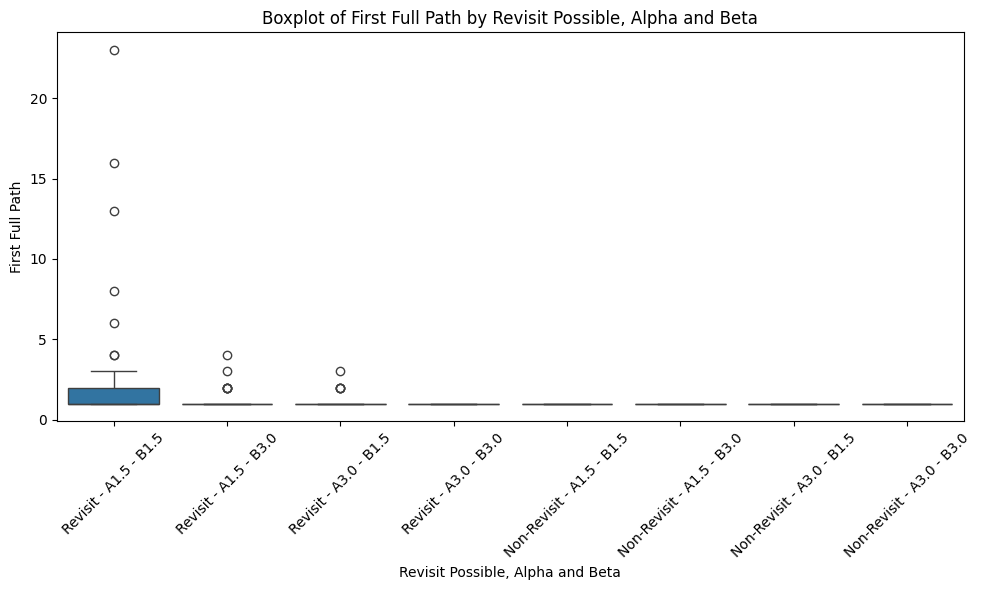

In [27]:
ga_aco_visualization = ga_aco_results.copy()

ga_aco_visualization["Revisit-Alpha-Beta Combination"] = ga_aco_visualization.apply(
    lambda row: f"{'Revisit' if row['ACO Revisit Possible'] else 'Non-Revisit'} - A{row['Alpha']} - B{row['Beta']}", 
    axis=1
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_aco_visualization, x="Revisit-Alpha-Beta Combination", y="ACO First Full Path")
plt.title("Boxplot of First Full Path by Revisit Possible, Alpha and Beta")
plt.xlabel("Revisit Possible, Alpha and Beta")
plt.ylabel("First Full Path")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

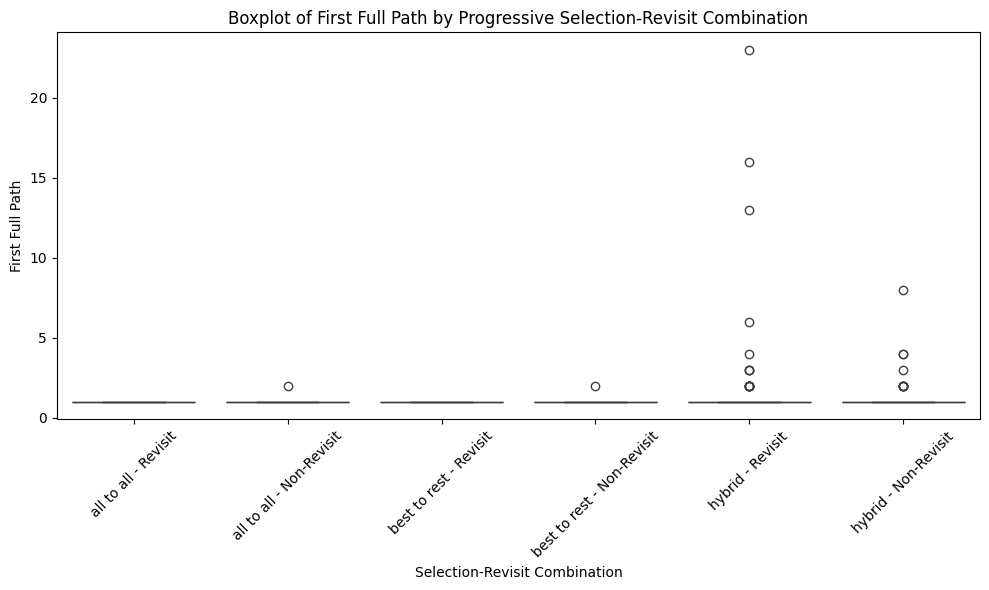

In [28]:
ga_aco_visualization["Selection-Revisit Combination"] = ga_aco_visualization.apply(
    lambda row: f"{row['Selection Type']} - {'Revisit' if row['GA Revisit Possible'] else 'Non-Revisit'}", 
    axis=1
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_aco_visualization, x="Selection-Revisit Combination", y="ACO First Full Path")
plt.title("Boxplot of First Full Path by Progressive Selection-Revisit Combination")
plt.xlabel("Selection-Revisit Combination")
plt.ylabel("First Full Path")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

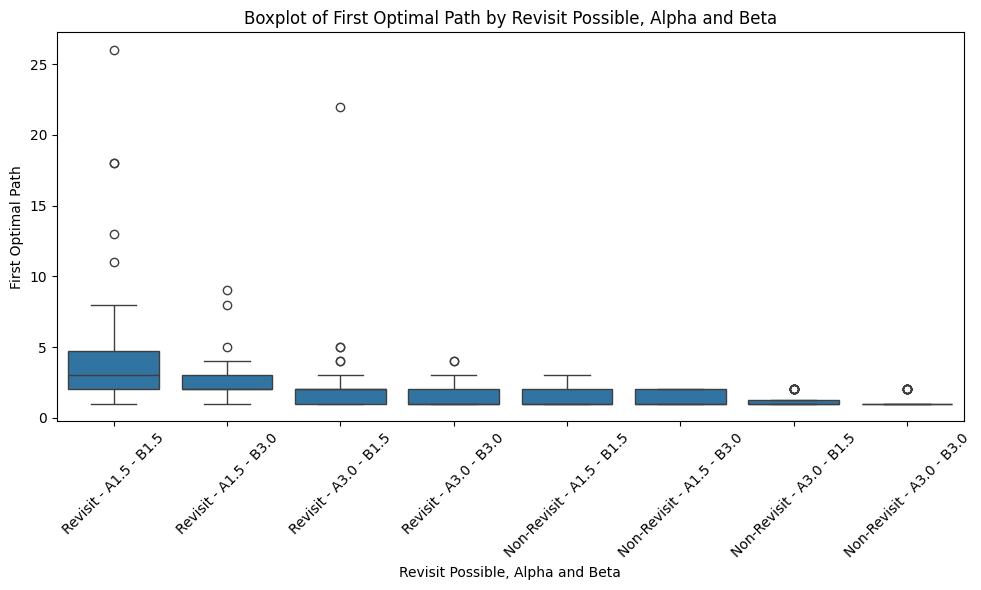

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_aco_visualization, x="Revisit-Alpha-Beta Combination", y="ACO First Optimal Path")
plt.title("Boxplot of First Optimal Path by Revisit Possible, Alpha and Beta")
plt.xlabel("Revisit Possible, Alpha and Beta")
plt.ylabel("First Optimal Path")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

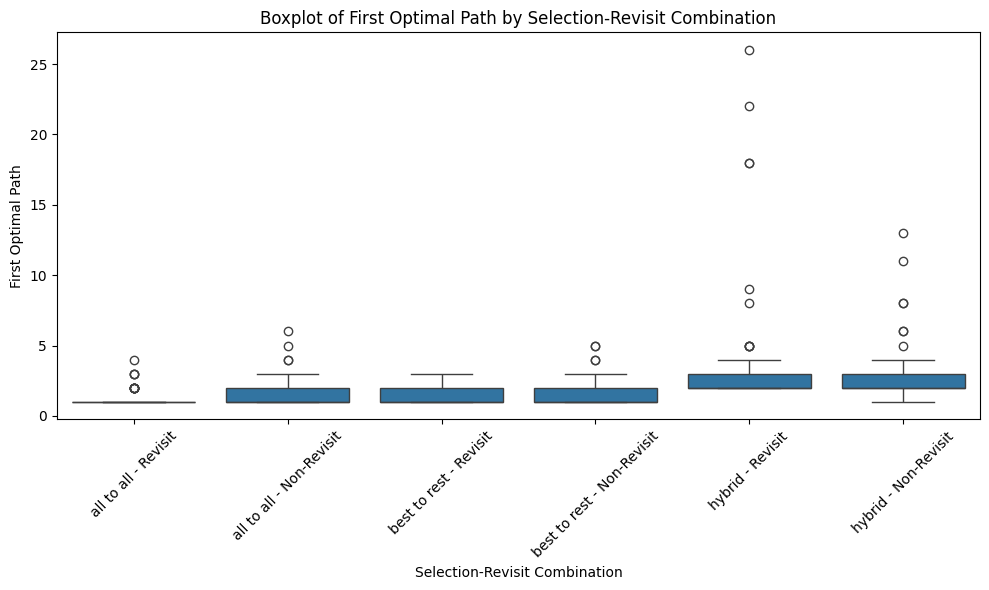

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_aco_visualization, x="Selection-Revisit Combination", y="ACO First Optimal Path")
plt.title("Boxplot of First Optimal Path by Selection-Revisit Combination")
plt.xlabel("Selection-Revisit Combination")
plt.ylabel("First Optimal Path")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

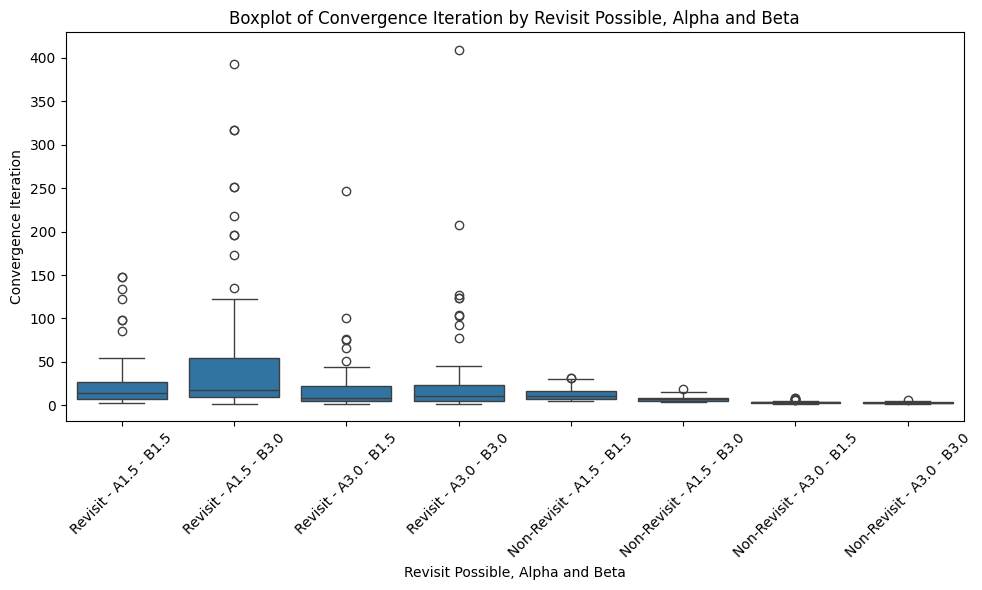

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_aco_visualization, x="Revisit-Alpha-Beta Combination", y="ACO Convergence Iteration")
plt.title("Boxplot of Convergence Iteration by Revisit Possible, Alpha and Beta")
plt.xlabel("Revisit Possible, Alpha and Beta")
plt.ylabel("Convergence Iteration")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

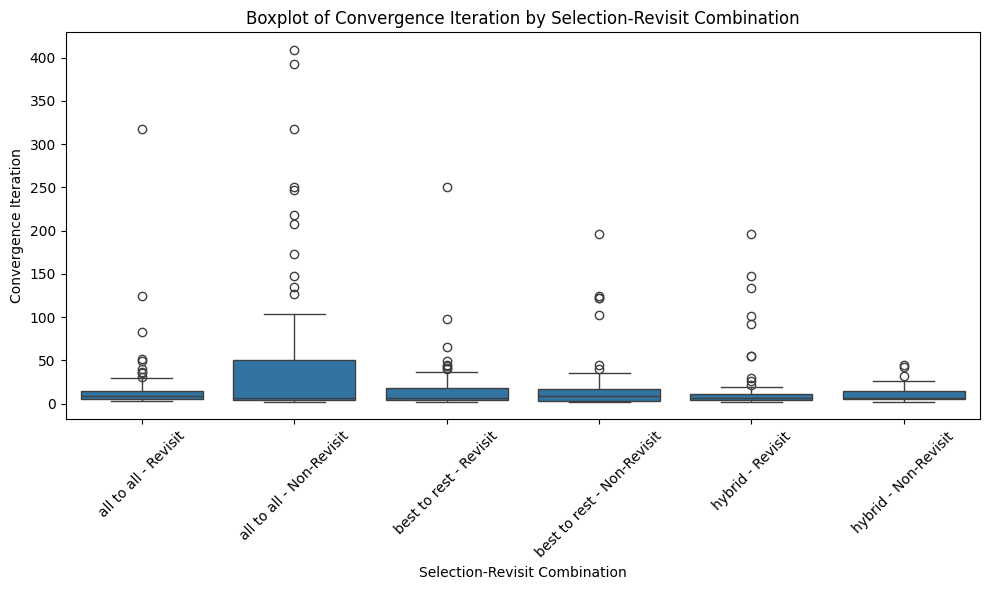

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_aco_visualization, x="Selection-Revisit Combination", y="ACO Convergence Iteration")
plt.title("Boxplot of Convergence Iteration by Selection-Revisit Combination")
plt.xlabel("Selection-Revisit Combination")
plt.ylabel("Convergence Iteration")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Time analysis

### GA

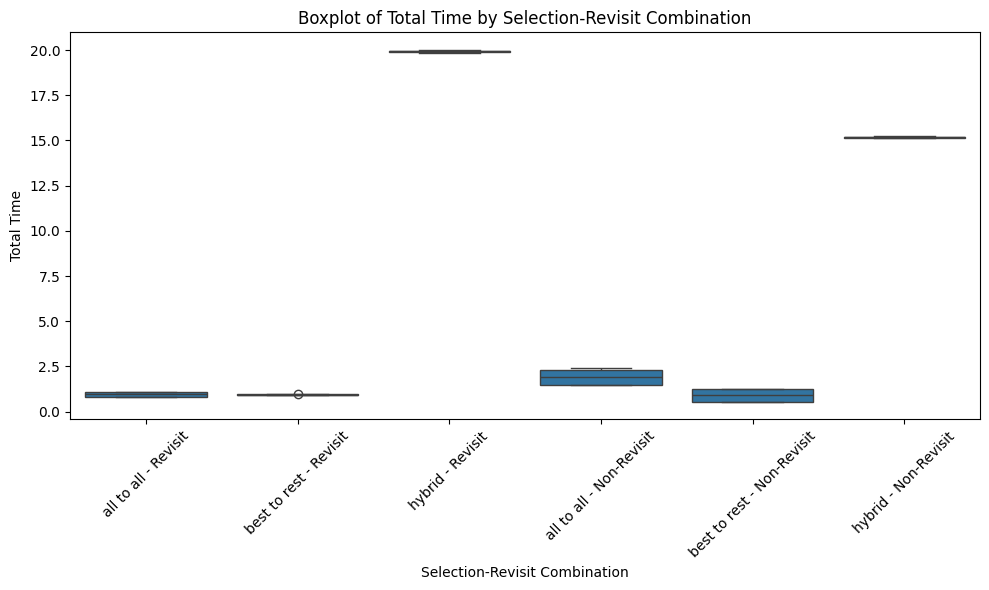

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_visualization, x="Selection-Revisit Combination", y="Total Time")
plt.title("Boxplot of Total Time by Selection-Revisit Combination")
plt.xlabel("Selection-Revisit Combination")
plt.ylabel("Total Time")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### ACO

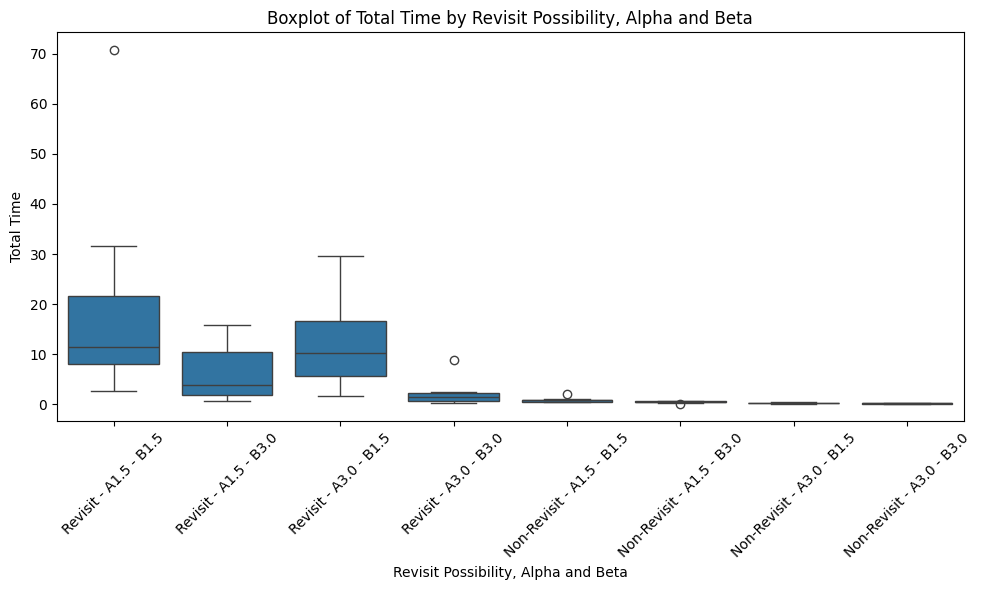

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=aco_visualization, x="Revisit-Alpha-Beta Combination", y="Total Time")
plt.title("Boxplot of Total Time by Revisit Possibility, Alpha and Beta")
plt.xlabel("Revisit Possibility, Alpha and Beta")
plt.ylabel("Total Time")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

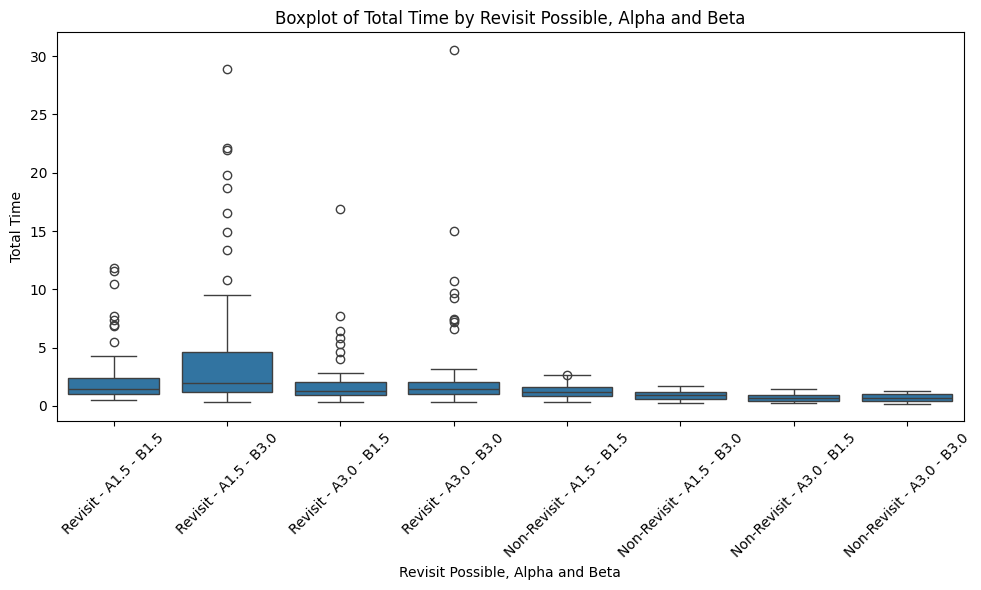

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_aco_visualization, x="Revisit-Alpha-Beta Combination", y="Total Time")
plt.title("Boxplot of Total Time by Revisit Possible, Alpha and Beta")
plt.xlabel("Revisit Possible, Alpha and Beta")
plt.ylabel("Total Time")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

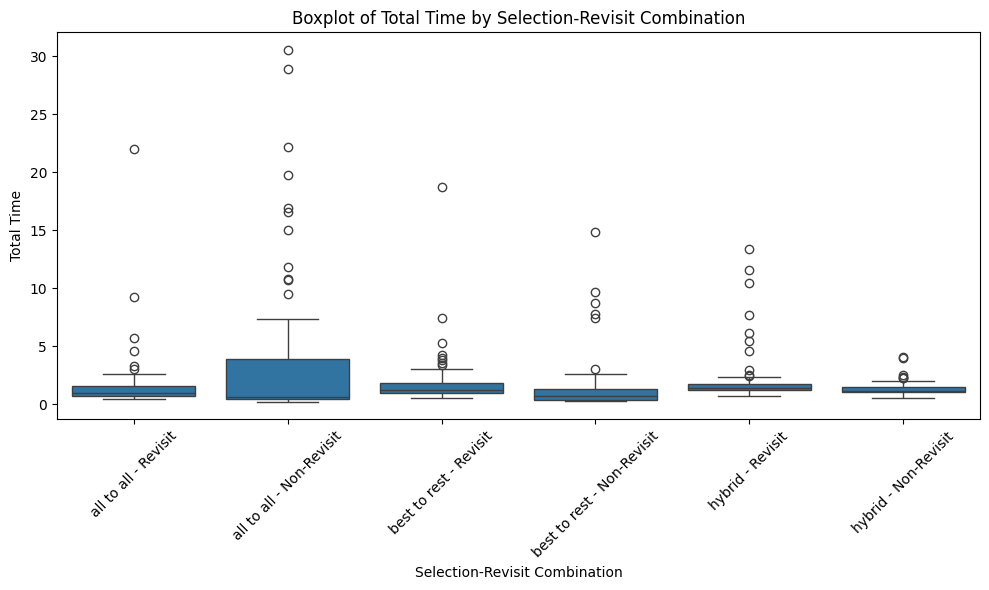

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ga_aco_visualization, x="Selection-Revisit Combination", y="Total Time")
plt.title("Boxplot of Total Time by Selection-Revisit Combination")
plt.xlabel("Selection-Revisit Combination")
plt.ylabel("Total Time")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()